In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Value counts for categorical columns
print("Segment Distribution:")
print(df['Segment'].value_counts())

print("\nShip Mode Distribution:")
print(df['Ship Mode'].value_counts())

print("\nCategory Distribution:")
print(df['Category'].value_counts())

Segment Distribution:
Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

Ship Mode Distribution:
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

Category Distribution:
Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64


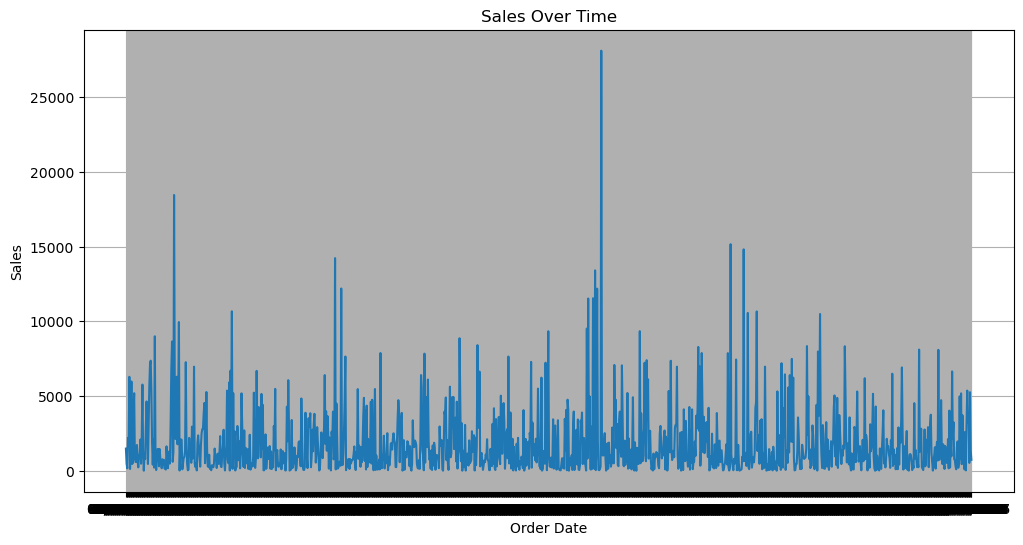

In [4]:
sales_time = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_time['Order Date'], sales_time['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
# Convert 'Order Date' to datetime if not already in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check the type to confirm conversion
print(df['Order Date'].dtype)

datetime64[ns]


/var/folders/qd/t1nfjv_s5p17mgf3j3dwlw1m0000gn/T/ipykernel_87145/853892653.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


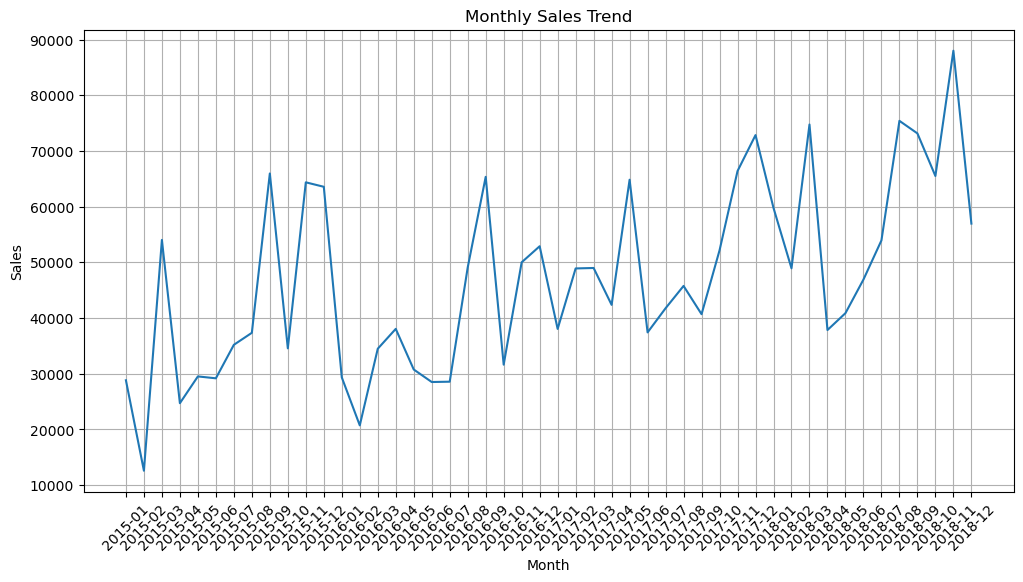

In [8]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

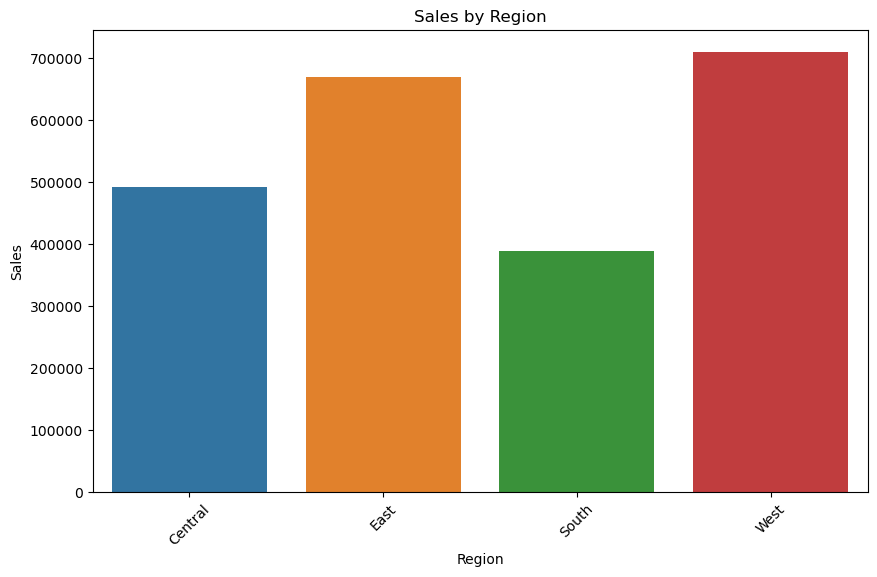

In [9]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

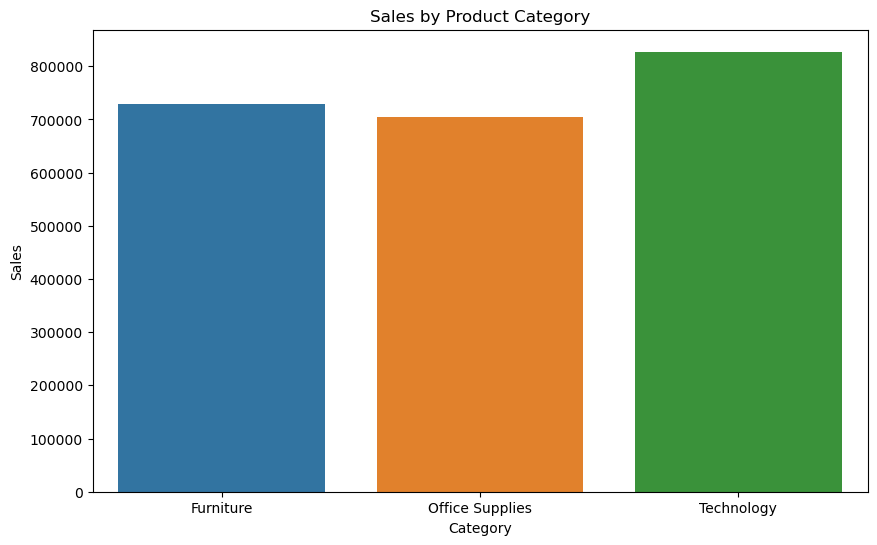

In [10]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

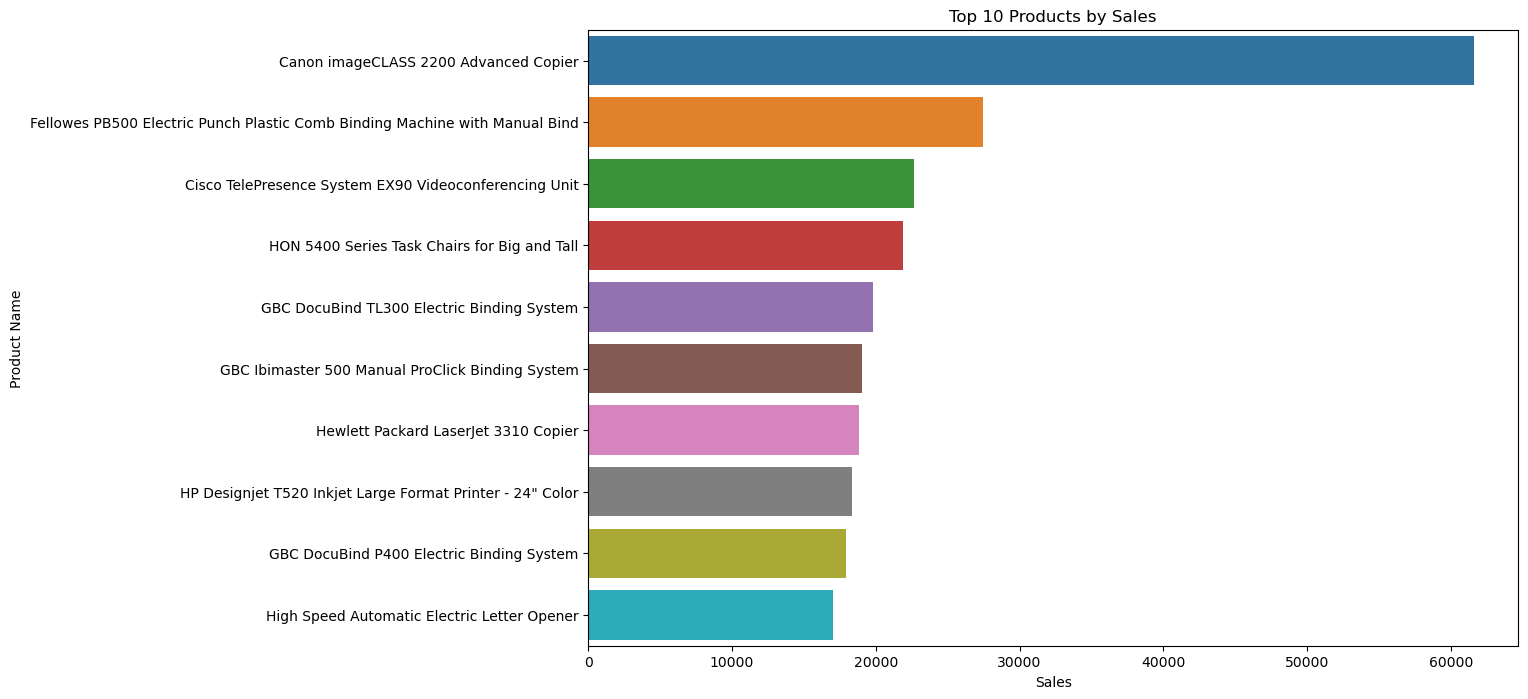

In [11]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

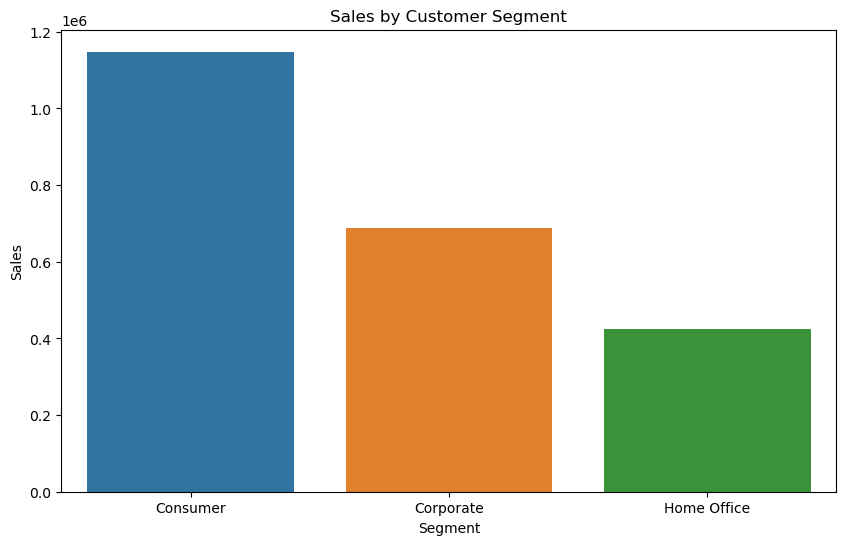

In [12]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales)
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()